# Comparison of Divergence (Conservation) and Skew-Symmetric (Split) Forms of the Inviscid Burgers' Equation

In [1]:
using CLOUD
using OrdinaryDiffEq
using LinearAlgebra
using TimerOutputs
using Plots, LaTeXStrings; pyplot()
path = "../results/burgers_split_wavenumber_sweep_t5/"

┌ Info: Precompiling CLOUD [fb992021-99c7-4c2d-a14b-5e48ac4045b2]
└ @ Base loading.jl:1342


"../results/burgers_split_wavenumber_sweep_t5/"

In [2]:
L = 2.0  # domain length
T = 2.0  # end time
M = 20  # number of elements
p = 4  # degree of discretization
a = 1.0
h_star = L/(M*(p+1))
n_s = 100
r = 10
tol = -1.0e-12

ec_flux = EntropyConservativeNumericalFlux{BurgersFlux{1}}()
central_flux = LaxFriedrichsNumericalFlux{BurgersFlux{1}}(0.0)
lf_flux = LaxFriedrichsNumericalFlux{BurgersFlux{1}}(1.0)

reference_approximation = ReferenceApproximation(
    DGSEM(p), Line(), N_plot=50)
spatial_discretization = SpatialDiscretization(uniform_periodic_mesh(
    reference_approximation.reference_element, 
    (0.0,L), M), reference_approximation)
strategy = Eager()
form = StrongFluxDiffForm()

dt_scale=0.01
dt = dt_scale*(L/M)/(2*p+1)
n_t = floor(Int, T/dt)

18000

In [3]:
dmd_analysis = Vector{DMDAnalysis}(undef,M*(p+1))
dmd_results = Vector{DynamicalAnalysisResults}(undef,M*(p+1))
λstar = zeros(ComplexF64, M*(p+1))
K = zeros(Float64, M*(p+1))
Kstar = zeros(ComplexF64, M*(p+1))

for i in 1:floor(Int, M*(p+1))
    results_path = string(path, "run_", i, "/")
    k = i*π
    conservation_law, spatial_discretization = load_project(results_path)

    dmd_analysis[i] = DMDAnalysis(results_path,
        conservation_law ,spatial_discretization, 
        r=r, n_s = n_s, tol=tol, name="dmd_analysis")
    
    dmd_results[i] = analyze(dmd_analysis[i])

    λstar[i] = real(dmd_results[i].λ[1]) + 1.0im*abs(imag(dmd_results[i].λ[1]))

    K[i] = k*h_star
    Kstar[i] = -λstar[i]*L*1.0im/(a*M*(p+1))
end

LoadError: ArgumentError: No file exists at given path: ../results/burgers_split_wavenumber_sweep_t5/run_51/project.jld2

In [4]:
using Plots, LaTeXStrings

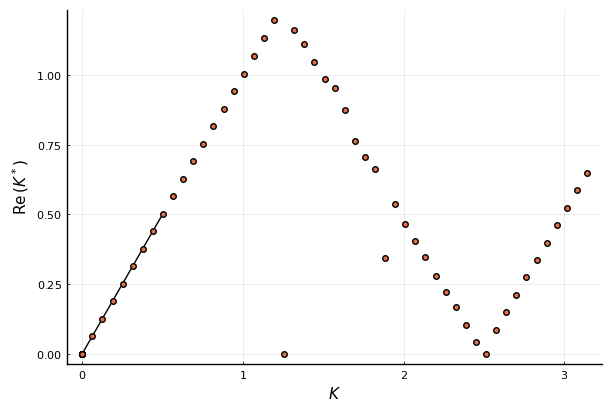

In [5]:
p = plot([0.0, 0.5], [0.0,0.5], linecolor="black", xlabel=L"K", ylabel=L"\mathrm{Re}\,(K^*)")
plot!(p,K, real(Kstar), seriestype=:scatter, legend=false)
savefig(p, string(path,"real.pdf"))

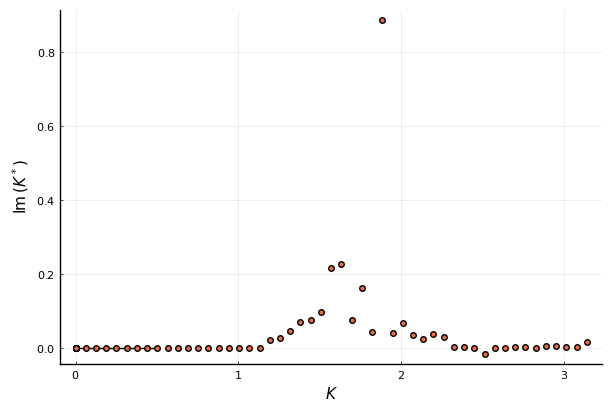

In [6]:
p = plot([0.0, 0.5], [0.0,0.0], linecolor="black", xlabel=L"K", ylabel=L"\mathrm{Im}\,(K^*)")
plot!(p,K, imag(Kstar), seriestype=:scatter, legend=false)
savefig(p, string(path,"imag.pdf"))